# Moore-Penrose Pseudoinverse

The Moore-Penrose pseudoinverse is a generalization of the matrix inverse that can be applied to non-square or singular matrices.

For the matrix $\boldsymbol{A}$, the pseudoinverse is denoted as $\boldsymbol{A}^+$ and its formula is, where:

- $\boldsymbol{U}$, $\boldsymbol{S}$ and $\boldsymbol{V}$ are SVD of $\boldsymbol{A}$
- $\boldsymbol{S}^+$ is a diagonal matrix of singular values of $\boldsymbol{A}$, with the non-zero singular values inverted

$$\boldsymbol{A}^+ = \boldsymbol{V} \boldsymbol{S}^+ \boldsymbol{U}^T$$

### Moore-Penrose Pseudoinverse with Python

In [41]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [28]:
A = torch.tensor([[-1, 2], [3, -2], [5, 7]], dtype=torch.float32)
A

tensor([[-1.,  2.],
        [ 3., -2.],
        [ 5.,  7.]])

In [25]:
torch.linalg.pinv(A)

tensor([[-0.0877,  0.1777,  0.0758],
        [ 0.0766, -0.1193,  0.0869]])

## Regression with Moore-Penrose Pseudoinverse

For regression problems, we typically have many more cases than features to predict.

In such cases, matrix inversion is not possible, but we can still use the Moore-Penrose pseudoinverse comes into play.

In [42]:
x1 = [0, 1, 2, 3, 4, 5, 6, 7.] # E.g.: Dosage of drug for treating Alzheimer's disease
y = [1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37] # E.g.: Patient's "forgetfulness score"

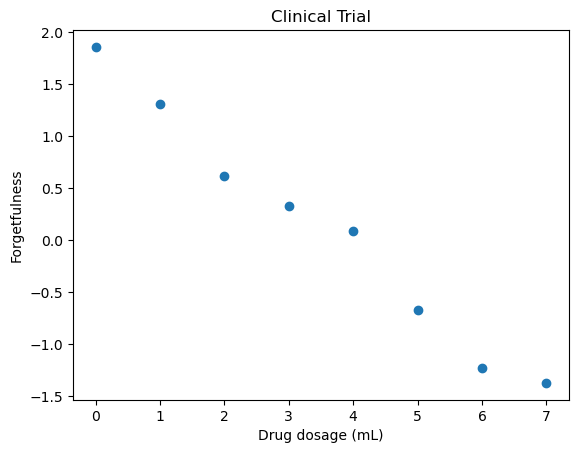

In [44]:
title = 'Clinical Trial'
xlabel = 'Drug dosage (mL)'
ylabel = 'Forgetfulness'

fig, ax = plt.subplots()
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
_ = ax.scatter(x1, y)

Although it appears there is only one predictor ($x_1$), the model requires a second one in order to allow for a $y$-intercept.

Let's define the second predictor as $x_0$:

In [45]:
x0 = np.ones(8)
x0

array([1., 1., 1., 1., 1., 1., 1., 1.])

Concatenating the two predictors into a single matrix:

In [46]:
X = np.column_stack((x0, x1))
X

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.],
       [1., 6.],
       [1., 7.]])

We can calculate the weights using the equation $\boldsymbol{w} = \boldsymbol{X}^+ \boldsymbol{y}$:

In [48]:
w = np.dot(np.linalg.pinv(X), y)
w

array([ 1.76      , -0.46928571])

The first weight is the $y$-intercept of the line, which is typically denoted as $b$:

In [49]:
b = np.asarray(w).reshape(-1)[0]
b

1.7599999999999993

While the second weight corresponds to the slope of the line, which is typically denoted as $m$:

In [50]:
m = np.asarray(w).reshape(-1)[1]
m

-0.4692857142857141

With the weights calculated, we can now plot the line of best fit:

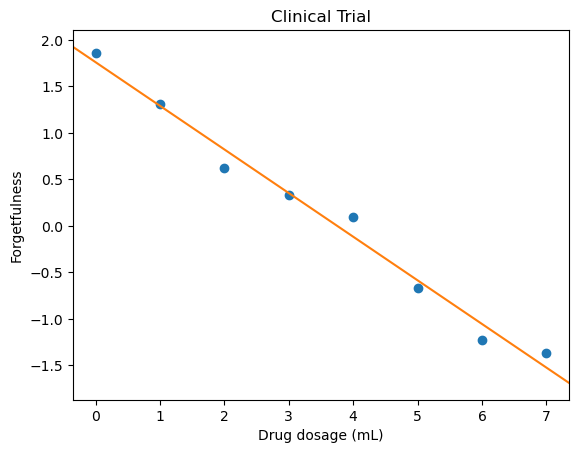

In [51]:
fig, ax = plt.subplots()

plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

ax.scatter(x1, y)

x_min, x_max = ax.get_xlim()
y_at_xmin = m*x_min + b
y_at_xmax = m*x_max + b

ax.set_xlim([x_min, x_max])
_ = ax.plot([x_min, x_max], [y_at_xmin, y_at_xmax], c='C01')